#### Objective: Searching Wikipedia article using Wikipedia app

##### Step 1: Load required libraries/ modeules

In [1]:
# pip install shapely

In [2]:
# pip install wikipedia

In [3]:
# pip install seaborn

In [4]:
# pip install contextily

In [5]:
# import packages
import wikipedia
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
import contextily as ctx
from matplotlib import pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


##### Step 2: Searching Wikipedia articles/titles using Wikipedia API

In [6]:
query = wikipedia.search('Himalaya', results=50)
query

['Himalayas',
 'Himalaya Wellness Company',
 'Himalaya Airlines',
 'Himalaya (disambiguation)',
 'Geology of the Himalayas',
 'PNS Himalaya',
 'Himalaya with Michael Palin',
 'Transhimalaya',
 'Western Himalayas',
 'Himalaya Kingdom',
 'Indian Himalayan Region',
 'Garhwal Himalayas',
 'Great Himalayas',
 'Assam Himalaya',
 'Himalaya frog',
 'Himalay Ki God Mein',
 'List of highest mountains on Earth',
 'Himalaya (film)',
 'Darjeeling Himalayan hill region',
 'New Federal State of China',
 'Manuel António Gomes',
 'Eight-thousander',
 'White-eared bulbul',
 'Eastern Himalayas',
 'Lower Himalayan Range',
 'SS Himalaya (1948)',
 'Great Himalaya Trail',
 'Himalaya clause',
 'Prince Himalaya of Nepal',
 'Himalaya Roadies',
 'Li Lu',
 'Shambhala (roller coaster)',
 'Miss Himalaya Pageant',
 'Himalaya TV',
 'Himalayan bulbul',
 'List of mountains in India',
 'Bhagyashree',
 'Ecology of the Himalayas',
 'Kishtwar Himalaya',
 'Hedera nepalensis',
 'Annapurna (mountain range)',
 'Taxus wallichia

##### Step 3: Post-processing and validating the title

In [7]:
titles = []
for title in query:
    try:
        page = wikipedia.page(title) # verify page existence
        titles.append(page.title)
    except (wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError):
            print(f"Skipping {title} as it does not exist as a page...")

Skipping Himalayas as it does not exist as a page...
Skipping Himalaya (disambiguation) as it does not exist as a page...
Skipping Transhimalaya as it does not exist as a page...
Skipping Himalaya frog as it does not exist as a page...
Skipping Great Himalaya Trail as it does not exist as a page...


##### Step 4: Verify the article titles contain a geo-tag and extract those coordinates

In [8]:
locations = {
    'Title' : [],
    'Lat' : [],
    'Lon' : []
}
for title in titles:
    try:
        page = wikipedia.page(title) # verify page existence
        locations['Lat'].append(float(page.coordinates[0]))
        locations['Lon'].append(float(page.coordinates[1]))
        locations['Title'].append(title)
    except KeyError as e:
            print(f"Skipping {title} as it is not geotagged...")

Skipping Himalaya Wellness Company as it is not geotagged...
Skipping Himalaya Airlines as it is not geotagged...
Skipping Geology of the Himalayas as it is not geotagged...
Skipping Himalaya with Michael Palin as it is not geotagged...
Skipping Western Himalayas as it is not geotagged...
Skipping Himalaya Kingdom as it is not geotagged...
Skipping Indian Himalayan Region as it is not geotagged...
Skipping Great Himalayas as it is not geotagged...
Skipping Himalay Ki God Mein as it is not geotagged...
Skipping List of highest mountains on Earth as it is not geotagged...
Skipping Himalaya (film) as it is not geotagged...
Skipping Darjeeling Himalayan hill region as it is not geotagged...
Skipping New Federal State of China as it is not geotagged...
Skipping Manuel António Gomes as it is not geotagged...
Skipping Eight-thousander as it is not geotagged...
Skipping White-eared bulbul as it is not geotagged...
Skipping Eastern Himalayas as it is not geotagged...
Skipping SS Himalaya (1948)

##### Step 5: Plot the locations and geotags of these titles as a dot map

In [9]:
# create dataframe

locations_df = pd.DataFrame(columns = ['Title','Lat','Lon'])
locations_df['Title'] = locations['Title']
locations_df['Lat'] = locations['Lat']
locations_df['Lon'] = locations['Lon']

geometry = [Point(xy) for xy in zip(locations_df['Lon'], locations_df['Lat'])]
gdf = GeoDataFrame(locations_df, geometry = geometry)

gdf


,Title,Lat,Lon,geometry
0,PNS Himalaya,24.790000,66.979722,POINT (66.97972 24.79000)
1,Garhwal Himalayas,30.617000,78.901000,POINT (78.90100 30.61700)
2,Assam Himalaya,29.630556,95.055278,POINT (95.05528 29.63056)
3,Lower Himalayan Range,28.750000,83.500000,POINT (83.50000 28.75000)
4,Shambhala (roller coaster),41.084722,1.156389,POINT (1.15639 41.08472)
5,Kishtwar Himalaya,33.567000,76.159900,POINT (76.15990 33.56700)
6,Annapurna (mountain range),28.613889,83.872222,POINT (83.87222 28.61389)
7,Shivling (mountain),30.880411,79.063469,POINT (79.06347 30.88041)
8,Hindu Kush,35.000000,71.000000,POINT (71.00000 35.00000)


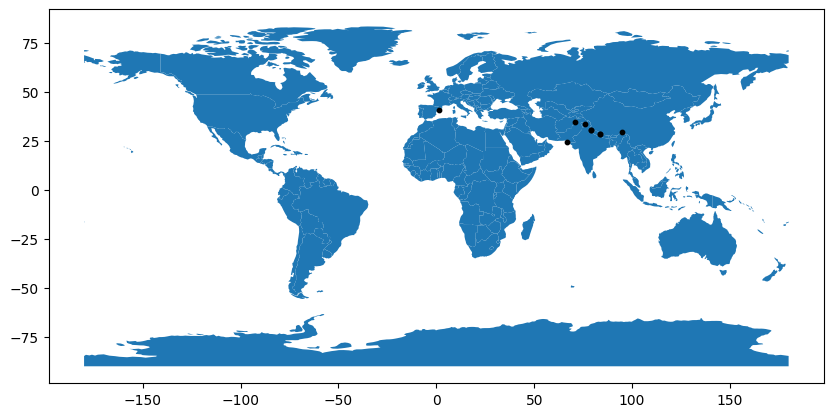

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize=(10,6)), marker='o',color='black',markersize=10);

##### Step 6: Kernel Density Estimations on the spatial locations of these articles

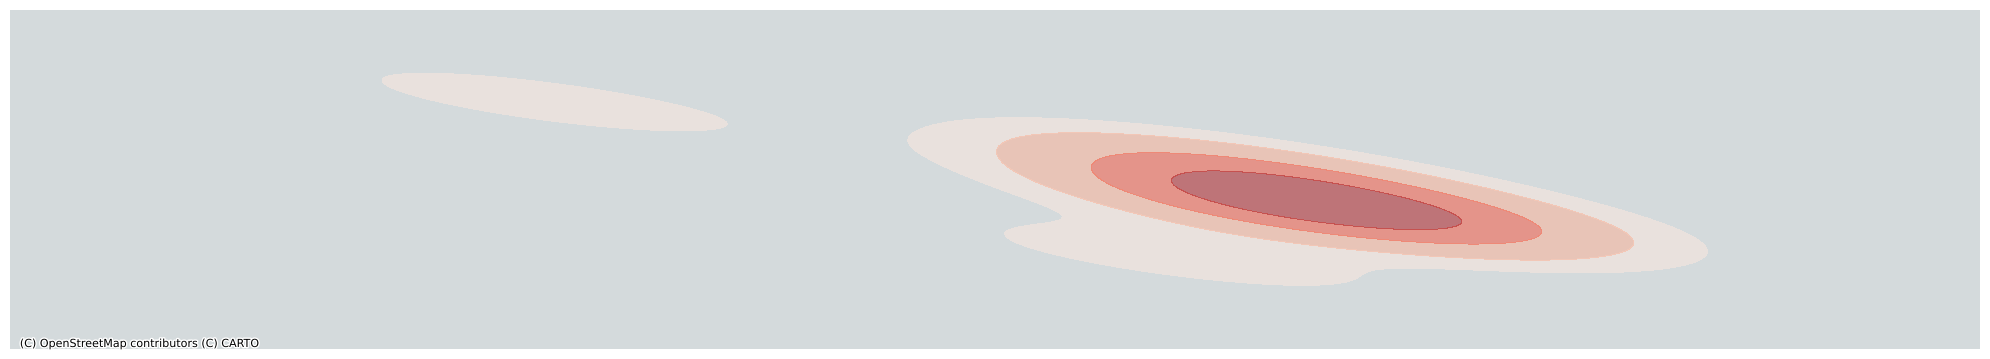

In [11]:
# create thresholds
levels = [0.2, 0.4, 0.6, 0.8, 1.0]
# create plot
f, ax = plt.subplots(ncols=1, figsize=(20,8))

#Kernel DEsity Estimation
kde = sns.kdeplot(
    ax = ax,
    x = gdf['geometry'].x,
    y = gdf['geometry'].y,
    levels = levels,
    shade = True,
    cmap = 'Reds',
    alpha = 0.5
)

#Add the basemap
ctx.add_basemap(ax=ax, source = ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()

plt.show()